## Steps to follow:

1. Import the data
2. Explore the data and identify things that would be worth exploring
3. Write two functions to make two different kinds of plots using matplotlib and seaborn (one each)
4. It might be a good idea to look at one of the categorical variables (gender, race/ethinicity) and the test scores 
5. Push your work back and send me a link to the repo!

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Import the StudentsPerformance.csv Data Set
#This Data Set is about _students grades in math, reading, and writing__ and has _1000_rows and _8_columns
#This data set look to have zero missing data due to isna sum to 0
df = pd.read_csv('StudentsPerformance.csv')
df.info()
df.describe()
df.head()

#Takes a df and column name and graphs a seaborn boxplot
def plotbar_sns(df,col):
    fig = sns.barplot(x=df.index , y=col, data= df)
    return fig
#Takes a df and column name and graphs a seaborn boxplot
def plotbar_mat(df,col):
    #fig = 
    return fig

def piv_heat(df,indexs,color):
    df_gender_prep = pd.pivot_table(df,
                        values = ['math score', 'reading score', 'writing score'],
                        index = indexs,
                        columns = [],aggfunc=[np.mean])

    cm = sns.light_palette(color, as_cmap=True)
    df_gender_prep.style.background_gradient(cmap=cm)
    return df_gender_prep.style.background_gradient(cmap=cm)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [225]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [226]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


#This data has some interesting data worth looking for correlations of factors to success.  
#Gender, Race,ethnicity, Parental education, test prep course could be factors to success
#Also the lunch fee plan may glean as to socio-economic situation.

In [227]:
#group1 is by gender
group1=df.groupby(['gender']).agg('mean')
df.groupby(['gender']).agg('mean')


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [228]:
#Observation Males higher by 5 points in Math,
#Females 7 points higher in reading, 
#Fm higher by 9 points in writing

#group2 is by race/eth 
group2 = df.groupby(['gender','race/ethnicity']).agg('mean')
df.groupby(['gender','race/ethnicity']).agg('mean')


math score  reading score  writing score
gender race/ethnicity                                          
female group A          58.527778      69.000000      67.861111
       group B          61.403846      71.076923      70.048077
       group C          62.033333      71.944444      71.777778
       group D          65.248062      74.046512      75.023256
       group E          70.811594      75.840580      75.536232
male   group A          63.735849      61.735849      59.150943
       group B          65.930233      62.848837      60.220930
       group C          67.611511      65.424460      62.712230
       group D          69.413534      66.135338      65.413534
       group E          76.746479      70.295775      67.394366

In [229]:
#Observation:  
#Math    H/L   Female Group E/Group A  Male Group E 76.7 Group A 63.9  
#Reading H/L   Female Group E/Group A  Male Group E 70.29 Group A 61.7
#Writing H/L   Female Group E/Group A  Male Group E Group A 61.7

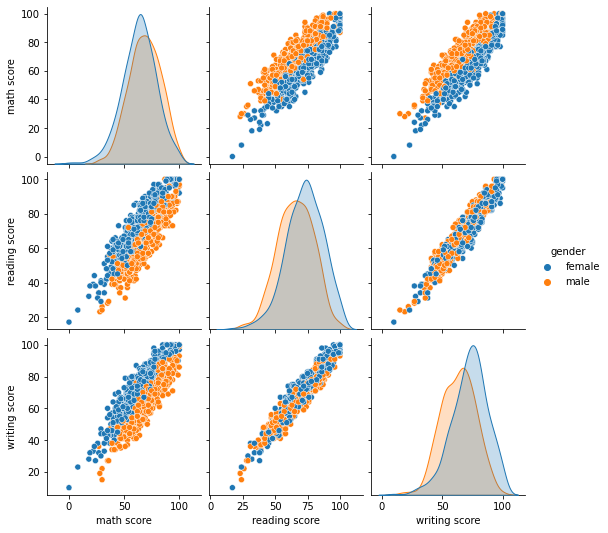

In [234]:
sns.pairplot(df, hue="gender")

In [246]:
#This pivot table is filtered by Gender and race/ethnicity
piv_heat(df,['gender','race/ethnicity'],'green')

In [244]:
#This pivot table is filtered by Gender and parental Education level
piv_heat(df,['gender','parental level of education'],'purple')

In [243]:
#This pivot table is filtered by Gender and lunch category
piv_heat(df,['gender','lunch'],'blue')

In [242]:
#This pivot table is filtered by Gender and test prep
piv_heat(df,['gender','test preparation course'],'red')

Text(0, 0.5, 'Math Score')

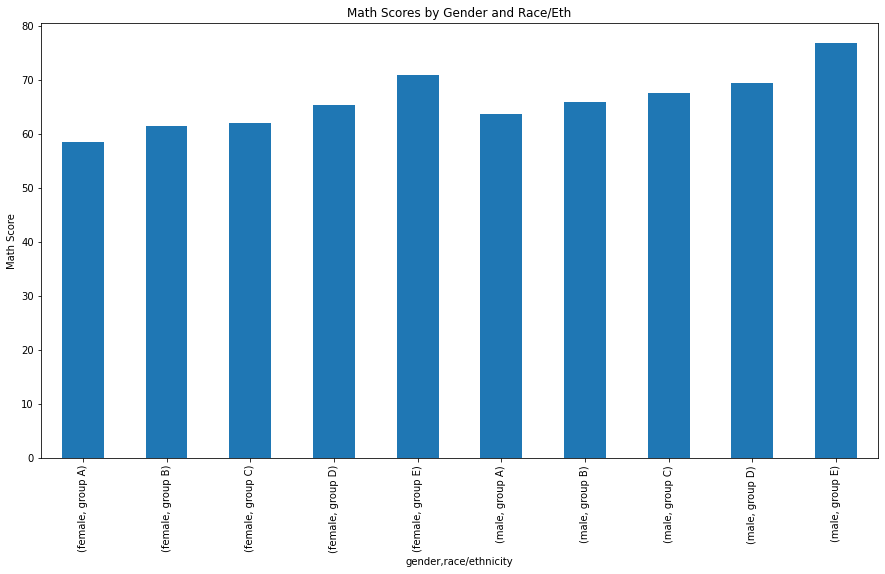

In [279]:
df.groupby(['gender','race/ethnicity'])['math score'].mean().plot(kind='bar', figsize=(15,8))
plt.title('Math Scores by Gender and Race/Eth')
plt.ylabel("Math Score")

Text(0, 0.5, 'Grades')

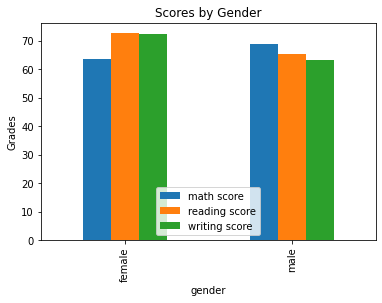

In [303]:
group1.plot(kind='bar')
plt.title('Scores by Gender')
plt.ylabel("Grades")

Text(0, 0.5, 'Math Score')

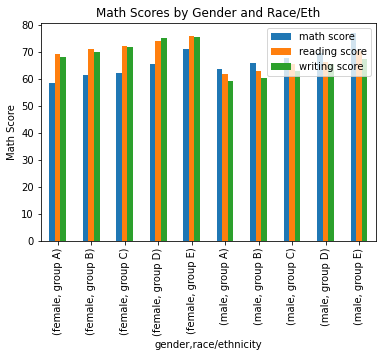

In [301]:
group2.plot(kind='bar')
plt.title('Math Scores by Gender and Race/Eth')
plt.ylabel("Grades")

In [305]:
#group4 is by gender and parental education 
group3 = df.groupby(['gender','parental level of education']).agg('mean')
df.groupby(['gender','parental level of education']).agg('mean')

math score  reading score  writing score
gender parental level of education                                          
female associate's degree            65.250000      74.120690      74.000000
       bachelor's degree             68.349206      77.285714      78.380952
       high school                   59.351064      68.202128      66.691489
       master's degree               66.500000      76.805556      77.638889
       some college                  65.406780      73.550847      74.050847
       some high school              59.296703      69.109890      68.285714
male   associate's degree            70.764151      67.433962      65.405660
       bachelor's degree             70.581818      68.090909      67.654545
       high school                   64.705882      61.480392      58.539216
       master's degree               74.826087      73.130435      72.608696
       some college                  69.009259      64.990741      63.148148
       some high school              67.840909      64.693182      61.375000

Text(0, 0.5, 'Grades')

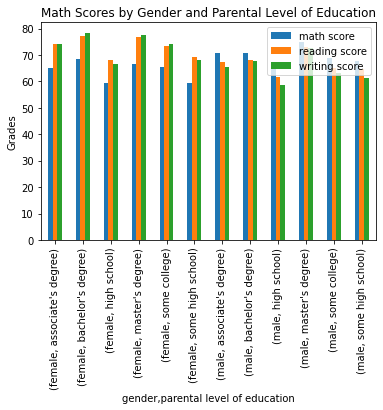

In [309]:
group3.plot(kind='bar')
plt.title('Math Scores by Gender and Parental Level of Education')
plt.ylabel("Grades")

In [307]:
#group4 is by gender and parental education 
group4 = df.groupby(['gender','lunch']).agg('mean')
df.groupby(['gender','lunch']).agg('mean')

math score  reading score  writing score
gender lunch                                                 
female free/reduced   55.814815      67.386243      66.444444
       standard       68.124620      75.607903      75.927052
male   free/reduced   62.457831      61.542169      59.126506
       standard       72.022152      67.537975      65.509494

Text(0, 0.5, 'Grades')

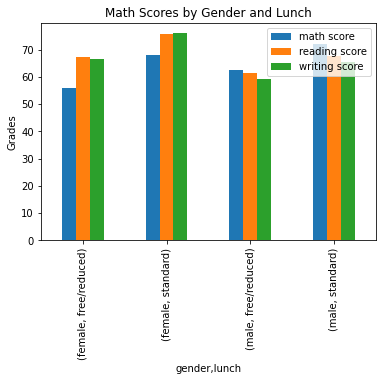

In [310]:
group4.plot(kind='bar')
plt.title('Math Scores by Gender and Lunch')
plt.ylabel("Grades")

In [315]:
group4.corr()

,math score,reading score,writing score
math score,1.000000,0.348456,0.287542
reading score,0.348456,1.000000,0.997666
writing score,0.287542,0.997666,1.000000


In [330]:
group4.stack()#.plot(kind='bar')

gender  lunch                      
female  free/reduced  math score       55.814815
                      reading score    67.386243
                      writing score    66.444444
        standard      math score       68.124620
                      reading score    75.607903
                      writing score    75.927052
male    free/reduced  math score       62.457831
                      reading score    61.542169
                      writing score    59.126506
        standard      math score       72.022152
                      reading score    67.537975
                      writing score    65.509494
dtype: float64

<AxesSubplot:xlabel='parental level of education'>

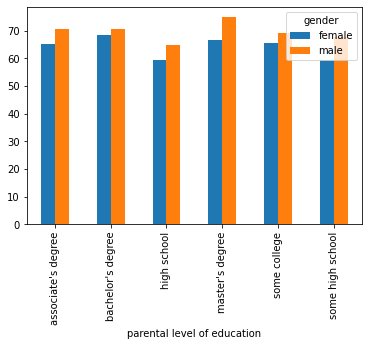

In [338]:
##pivot table
df.pivot_table('math score',index='parental level of education', columns='gender',aggfunc='mean').plot(kind='bar')